In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [30]:
data = pd.read_csv("titanicdata.csv")
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
# data.dropna(subset="Embarked", inplace=True)
data.dropna(inplace=True)
data

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Class     712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [32]:
# Normalizing the data columns in strings
for index, row in data.iterrows():
    # "Sex" column
    # 0: male
    # 1: female
    if row["Sex"] == "male":
        data.at[index, "Sex"] = 0
    else:
        data.at[index, "Sex"] = 1
    # "Embarked" column
    # 0: S
    # 1: C
    # 2: Q
    if row["Embarked"] == "S":
        data.at[index, "Embarked"] = 0
    elif row["Embarked"] == "C":
        data.at[index, "Embarked"] = 1
    elif row["Embarked"] == "Q":
        data.at[index, "Embarked"] = 2

In [33]:
data = data.astype({"Sex": "int", "Embarked": "int"})
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Class     712 non-null    int64  
 2   Sex       712 non-null    int32  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 60.7 KB


,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
889,1,1,0,26.0,0,0,30.0000,1


<AxesSubplot: >

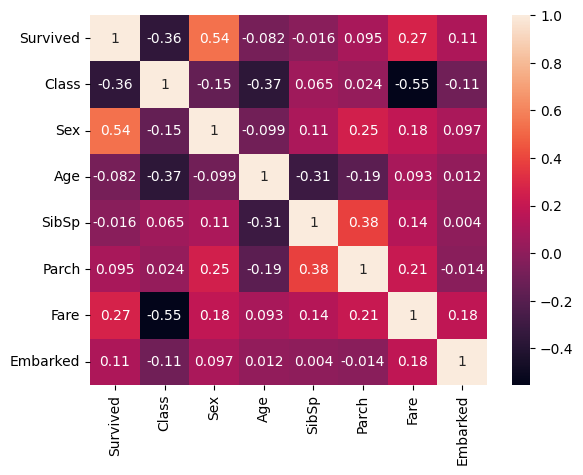

<Figure size 1500x1000 with 0 Axes>

In [34]:
# Correlation
correlation = data.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, ax=ax, annot=True)

In [ ]:
# Splitting Data
split_index = int(len(data.index) * 0.7)
training_data, testing_data = data.iloc[:split_index], data.iloc[split_index:]

In [ ]:
# K nearest neighbors
# def get_distance_between_points(x1, y1, z1, x2, y2, z2):
#     return sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)

# def find_nearest(data, k=3, ):
#     for 

# def k_nearest_neighbors(data, x, y, z):
#     top_points = 

In [ ]:
# Sklearn KNN
features = ["Class", "Sex", "Age"]
train_x = []
train_y = training_data["Survived"]
for index, row in training_data.iterrows():
    entry = []
    entry.append(row[features[0]])
    entry.append(row[features[1]])

knn = KNeighborsClassifier(n_neighbors=5).fit()


---
# Barplots

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

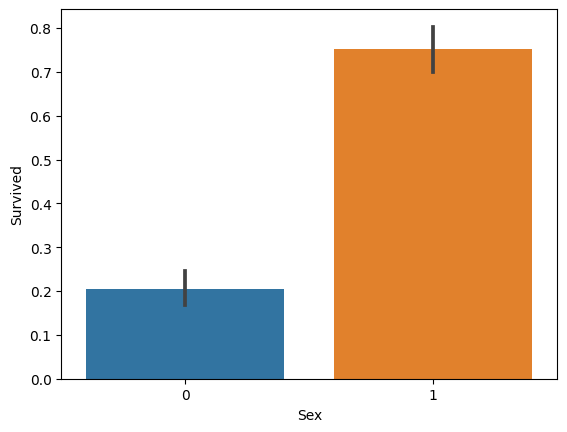

In [35]:
sns.barplot(x="Sex", y="Survived", data=data)

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

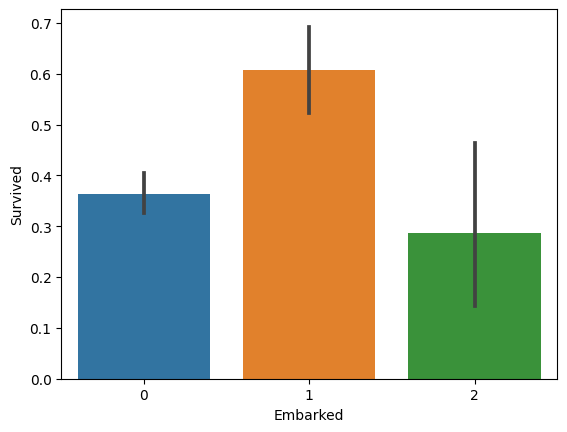

In [36]:
# 0: S
# 1: C
# 2: Q
sns.barplot(x="Embarked", y="Survived", data=data)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

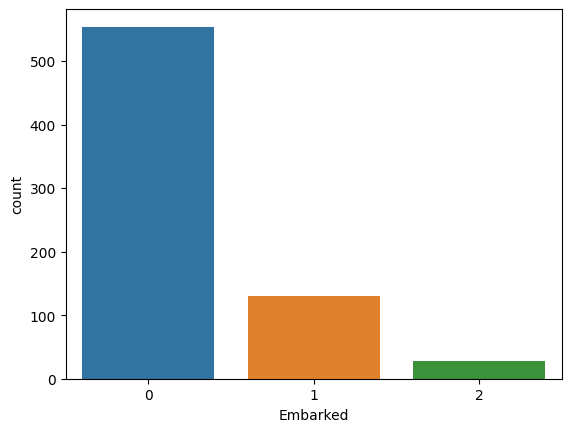

In [38]:
sns.countplot(data=data, x="Embarked")

<AxesSubplot: xlabel='Class', ylabel='Survived'>

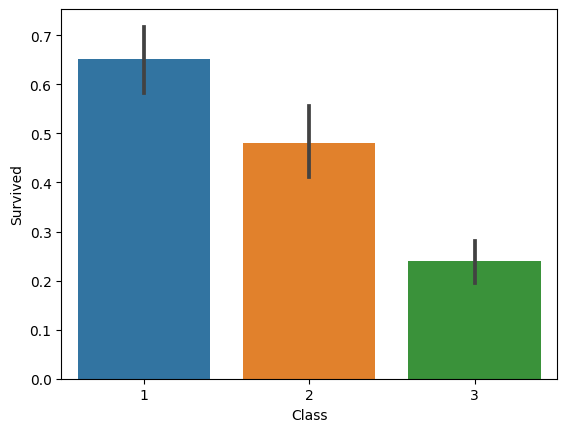

In [39]:
sns.barplot(x="Class", y="Survived", data=data)

<AxesSubplot: xlabel='Class', ylabel='count'>

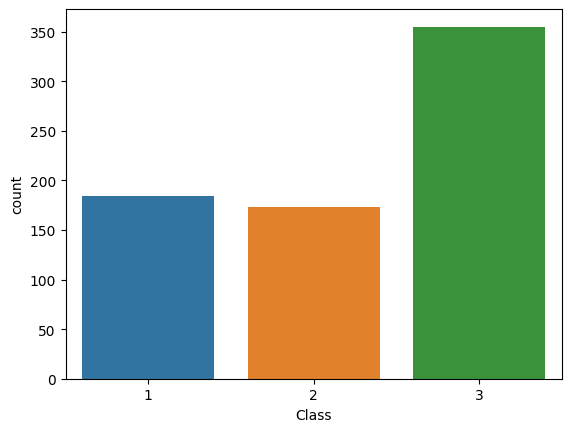

In [40]:
sns.countplot(data=data, x="Class")